### 运用Scikit-learn标准库进行梯度下降，正态特征缩放的线性回归拟合。

均方误差（Mean Squared Error, MSE）：
$$MSE = \frac{1}{2n} \sum\left(\hat{y}_i - y_i\right)^2$$

$y_i$是真实值；$\hat{y}_i$是预测值；$n$是样本数量。

决定系数（$R^2$）：$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}\quad\quad \text{模型能够解释的变异性比例}$$

- $SS_{res} = \sum (y_i - \hat{y}_i)^2$ - 残差平方和（Residual Sum of Squares）
    - 模型无法解释的变异性
- $SS_{tot} = \sum (y_i - \overline{y}_i)^2$ - 总平方和（Total Sum of Squares）
    - 数据的总变异性

1. $R^2 = 1$ - 完美预测
2. $R^2 = 0$ - 预测效果等同于只用均值预测
3. $R^2 < 0$ - 预测效果比均值还差

In [259]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


In [260]:
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False

#### 1. 生成数据：$$y = 2x_1 + 4x_2 + 1$$

In [261]:
def generate_data(n_samples = 1000, noise = 0.1, random_state = 42):
    """
    Returns:
        X: feature matrix
        y: Target variable
    """
    np.random.seed(random_state)

    x1 = np.random.uniform(-5, 5, n_samples)
    x2 = np.random.uniform(-3, 3, n_samples)
    X = np.column_stack([x1, x2])

    y = 2 * x1 + 4 * x2 + 1 + np.random.normal(0, noise, n_samples)

    return X, y


In [262]:
X, y = generate_data(n_samples = 1000, noise = 0.5)
print(f"Generate {X.shape[0]} samples, {X.shape[1]} features.")


Generate 1000 samples, 2 features.


In [263]:
print(f"First 3 rows of X: \n {X[:3]}\n ")
print(f"First 3 values of y: {y[:3]}")

First 3 rows of X: 
 [[-1.25459881 -1.88920243]
 [ 4.50714306  0.25140568]
 [ 2.31993942  2.23767502]]
 
First 3 values of y: [-9.50499862 10.60646869 14.47733945]


#### 2. 划分训练集和测试集

In [264]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.2, random_state = 42
    )


In [265]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 800
Testing set size: 200


#### 3. 特征缩放（标准化）

In [266]:
def scale_features(X_train, X_test):
    """
    Returns:
        X_train_scaled: Standardized training features
        X_test_scaled: Standardized test features
        scaler: Trained standardizer
    """
    scaler = StandardScaler()

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)

    return X_train_scaled, X_test_scaled, scaler


In [267]:
X_train_scaled, X_test_scaled, scaler = scale_features(X_train, X_test)


In [268]:
print(f"Feature's mean: \n {scaler.mean_}\n ")
print(f"Feature's std: \n {scaler.scale_}\n ")


Feature's mean: 
 [-0.29982273 -0.13577425]
 
Feature's std: 
 [2.88657779 1.7473528 ]
 


#### 4. 梯度下降训练模型

In [269]:
def train_model(X_train, y_train, learning_rate = 0.01, max_iter = 1000, random_state = 42):
    """
    Returns:
        model: Trained model
    """
    model = SGDRegressor(
        learning_rate = "constant",
        eta0 = learning_rate,
        max_iter = max_iter,
        random_state = random_state,
        tol = 1e-3
    )

    model.fit(X_train, y_train)
    return model


In [270]:
model = train_model(X_train_scaled, y_train, learning_rate = 0.01, max_iter = 1000)


#### 5. 评估模型

In [271]:
def evaluate_model(model, X_test, y_test):
    """
    Returns:
        mse: Mean squared error
        r2: R² score
        predictions: Predicted values
    """
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return mse, r2, predictions


In [272]:
mse, r2, predictions = evaluate_model(model, X_test_scaled, y_test)


#### 6. 打印结果

In [ ]:
def print_results(model, scaler, mse, r2):
    
    print("=" * 50)
    print("Linear Regression Results (Using Gradient Descent)")
    print("=" * 50)

    # Get standardized coefficients
    # Then convert back to original feature coefficients
    coefficients_scaled = model.coef_
    intercept_scaled = model.intercept_
    coefficients_original = coefficients_scaled / scaler.scale_
    intercept_original = intercept_scaled - np.sum(coefficients_scaled * scaler.mean_ / scaler.scale_)
    
    print(f"Standardized coefficients: {coefficients_scaled}")
    print(f"Standardized intercept: {np.round(intercept_scaled, 2)}")
    print(f"Original feature coefficients: {coefficients_original}")
    print(f"Original intercept: {np.round(intercept_original, 2)}")
    print(f"\n True model: y = 2x₁ + 4x₂ + 1")
    print(f"Predicted model: y = {np.round(coefficients_original[0], 2)}x₁ + {np.round(coefficients_original[1], 2)}x₂ + {np.round(intercept_original, 2)}")
    print(f"\n MSE: {mse:.4f}")
    print(f"R²: {r2:.4f}")
    print("=" * 50)

In [274]:
print_results(model, scaler, mse, r2)


Linear Regression Results (Using Gradient Descent)
Standardized coefficients: [5.80170462 7.04832812]
Standardized intercept: [1.29]
Original feature coefficients: [2.00989027 4.03371782]
Original intercept: [2.44]

 True model: y = 2x₁ + 4x₂ + 1
Predicted model: y = 2.01x₁ + 4.03x₂ + [2.44]

 MSE: 2.1641
R²: 0.9739


#### 7. 可视化结果

In [275]:
def plot_results(X_test, y_test, predictions, scaler):
    
    X_test_original = scaler.inverse_transform(X_test)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Predicted vs True values
    axes[0, 0].scatter(y_test, predictions, alpha=0.6)
    axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0, 0].set_xlabel('True Values')
    axes[0, 0].set_ylabel('Predicted Values')
    axes[0, 0].set_title('Predicted vs True Values')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Residual plot
    residuals = y_test - predictions
    axes[0, 1].scatter(predictions, residuals, alpha=0.6)
    axes[0, 1].axhline(y=0, color='r', linestyle='--')
    axes[0, 1].set_xlabel('Predicted Values')
    axes[0, 1].set_ylabel('Residuals')
    axes[0, 1].set_title('Residual Plot')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. 特征1 vs 目标变量
    axes[1, 0].scatter(X_test_original[:, 0], y_test, alpha=0.6, label='True Values')
    axes[1, 0].scatter(X_test_original[:, 0], predictions, alpha=0.6, label='Predicted Values')
    axes[1, 0].set_xlabel('x1')
    axes[1, 0].set_ylabel('y')
    axes[1, 0].set_title('Feature 1 vs Target Variable')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. 特征2 vs 目标变量
    axes[1, 1].scatter(X_test_original[:, 1], y_test, alpha=0.6, label='True Values')
    axes[1, 1].scatter(X_test_original[:, 1], predictions, alpha=0.6, label='Predicted Values')
    axes[1, 1].set_xlabel('x2')
    axes[1, 1].set_ylabel('y')
    axes[1, 1].set_title('Feature 2 vs Target Variable')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    

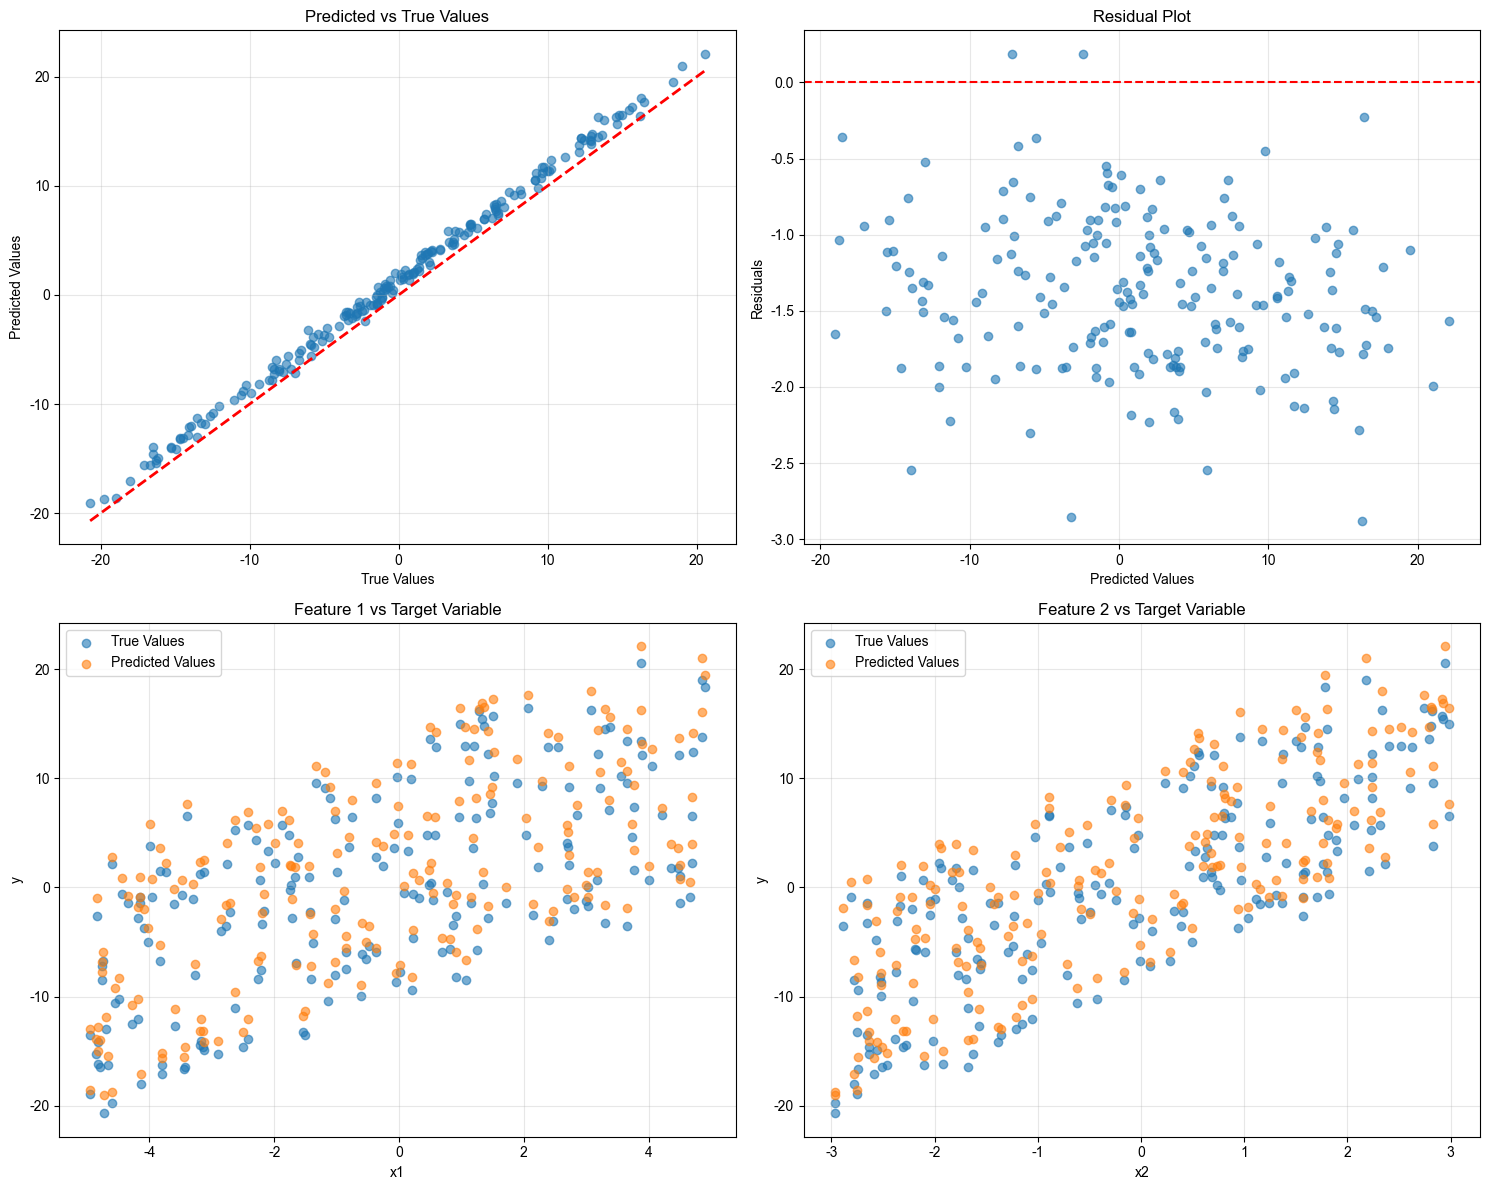

In [276]:
plot_results(X_test_scaled, y_test, predictions, scaler)